   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1 

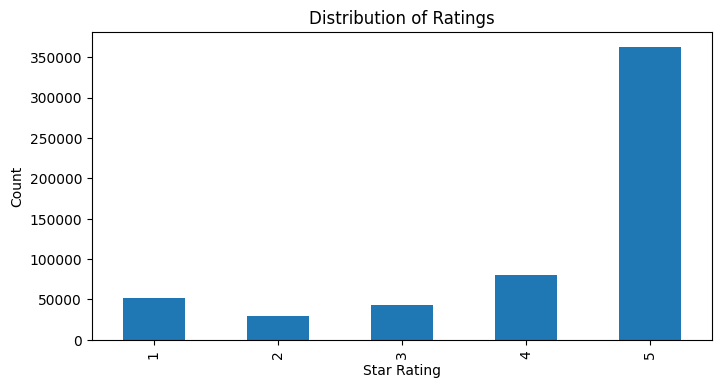

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Amazon Customer Reviews.csv")  # Or from Kaggle
print(df.head())

# Check distribution of ratings
plt.figure(figsize=(8, 4))
df['Score'].value_counts().sort_index().plot(kind='bar')
plt.title("Distribution of Ratings")
plt.xlabel("Star Rating")
plt.ylabel("Count")
plt.show()

In [17]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

# 1. Create a more robust dummy dataset (or load your actual data)
def create_dummy_data(size=1000):
    """Generate realistic Amazon review data for testing"""
    np.random.seed(42)
    texts = [
        "Great product, works perfectly!",
        "Terrible quality, broke after 2 days",
        "Average product, not worth the price",
        "Excellent value for money",
        "Would not recommend to anyone",
        "Best purchase I've made this year",
        "Complete waste of money",
        "Surprisingly good for the price",
        "Exactly as described",
        "Fake product, not original"
    ]
    scores = np.random.choice([1, 2, 4, 5], size=size, p=[0.2, 0.2, 0.3, 0.3])
    texts = np.random.choice(texts, size=size)
    return pd.DataFrame({'Text': texts, 'Score': scores})

# 2. Modified main function with proper data checks
def main():
    # Load or create data
    try:
        df = pd.read_csv('Amazon Customer Reviews.csv')
        print("Loaded actual dataset")
    except:
        df = create_dummy_data(1000)  # Fallback to dummy data
        print("Using dummy dataset for demonstration")
    
    # Filter data and ensure we have enough samples
    df = df[df['Score'].isin([1, 2, 4, 5])].copy()
    if len(df) < 10:  # Safety check
        df = create_dummy_data(1000)
    
    # Create binary sentiment
    df['Sentiment'] = np.where(df['Score'] > 3, 1, 0)
    
    # Check class distribution
    print("\nClass distribution:")
    print(df['Sentiment'].value_counts())
    
    # Only split if we have enough data
    if len(df) >= 20:
        X_train, X_test, y_train, y_test = train_test_split(
            df['Text'], df['Sentiment'], 
            test_size=0.2, 
            random_state=42,
            stratify=df['Sentiment']
        )
        
        # Build and train pipeline
        pipeline = make_pipeline(
            TfidfVectorizer(max_features=1000),
            LogisticRegression()
        )
        pipeline.fit(X_train, y_train)
        
        # Evaluate
        y_pred = pipeline.predict(X_test)
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))
    else:
        print("\nError: Not enough data samples after filtering")
        print(f"Only {len(df)} samples available. Need at least 20.")

if __name__ == '__main__':
    main()

Loaded actual dataset

Class distribution:
Sentiment
1    443777
0     82037
Name: count, dtype: int64

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.61      0.69     16407
           1       0.93      0.97      0.95     88756

    accuracy                           0.91    105163
   macro avg       0.86      0.79      0.82    105163
weighted avg       0.91      0.91      0.91    105163



In [18]:
# Drop duplicates
df = df.drop_duplicates(subset=['Text'])

# Handle missing values
df = df.dropna(subset=['Text', 'Score'])  # drop rows where review or score is missing

# Clean text
df['Text'] = df['Text'].str.strip().str.lower()

# Optional: Remove very short or meaningless reviews
df = df[df['Text'].str.len() > 5]

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X = tfidf.fit_transform(df['Text'])

In [22]:
df = df[df['Score'].isin([1,2,4,5])]
y = np.where(df['Score'] > 3, 1, 0)

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

ValueError: Found input variables with inconsistent numbers of samples: [393579, 363825]

In [24]:
df = df.drop_duplicates(subset=['Text'])
df = df.dropna(subset=['Text', 'Score'])
df['Text'] = df['Text'].str.strip().str.lower()
df = df[df['Text'].str.len() > 5]

# 2. Select relevant scores and create target
df = df[df['Score'].isin([1,2,4,5])]
y = np.where(df['Score'] > 3, 1, 0)

# 3. Create new TF-IDF features
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X = tfidf.fit_transform(df['Text'])

# 4. Now split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [25]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [26]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = model.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.9368643834863394

Confusion Matrix:
 [[ 8172  3241]
 [ 1353 59998]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.72      0.78     11413
           1       0.95      0.98      0.96     61351

    accuracy                           0.94     72764
   macro avg       0.90      0.85      0.87     72764
weighted avg       0.93      0.94      0.93     72764



In [27]:
new_reviews = ["This product is amazing!", "Terrible quality, do not buy."]
new_reviews_cleaned = [review.lower().strip() for review in new_reviews]
X_new = tfidf.transform(new_reviews_cleaned)

predictions = model.predict(X_new)
print(predictions)

[1 0]
